In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles,make_blobs,make_moons,make_biclusters
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
from sklearn.preprocessing import OneHotEncoder
from IPython.display import HTML
from tqdm import tqdm_notebook,tqdm_gui
import imageio
from sklearn.model_selection import train_test_split as tts
import matplotlib.colors


In [2]:
 my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [3]:
np.random.seed(0)

In [4]:
data,labels=make_blobs(1000,3,6,shuffle=True,random_state=0)

In [5]:
data.shape

(1000, 3)

In [6]:
labels.shape

(1000,)

In [7]:
enc=OneHotEncoder()

In [8]:
x_train,x_val,y_train,y_val=tts(data,labels,stratify=labels,random_state=0)
x_train.shape

(750, 3)

In [9]:
x_val.shape

(250, 3)

In [10]:
y_train.shape

(750,)

In [11]:
y_val.shape

(250,)

In [12]:
#Converting y_train and y_val in one hot encoded vectors
y_train_oh=enc.fit_transform(np.expand_dims(y_train,1)).toarray()
y_train_oh.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(750, 6)

In [13]:
y_train_oh

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [14]:
y_val_oh=enc.fit_transform(np.expand_dims(y_val,1)).toarray()
y_val_oh.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(250, 6)

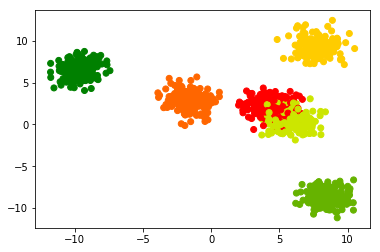

In [15]:
#Plottinng our data with two features ot of three features
plt.scatter(data[:,1],data[:,2],c=labels,cmap=my_cmap)
plt.show()

In [16]:
class ffn_multi:
    
    def __init__(self):
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.w3=np.random.randn()
        self.w4=np.random.randn()
        self.w5=np.random.randn()
        self.w6=np.random.randn()
        self.w7=np.random.randn()
        self.w8=np.random.randn()
        self.w9=np.random.randn()
        self.w10=np.random.randn()
        self.w11=np.random.randn()
        self.w12=np.random.randn()
        self.w13=np.random.randn()
        self.w14=np.random.randn()
        self.b1=0
        self.b2=0
        self.b3=0
        self.b4=0
        self.b5=0
        self.b6=0
        self.b7=0
        self.b8=0
        self.b9=0
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
        
    def forward_pass(self,x):
        self.x1,self.x2,self.x3=x
            
        #First layer
        self.a1=self.w1 * self.x1 + self.w3 * self.x2 + self.w5 * self.x3 + self.b1
        self.a2=self.w2 * self.x1 + self.w4 * self.x2 + self.w6 * self.x3 + self.b2
        self.h1=self.sigmoid(self.a1)
        self.h2=self.sigmoid(self.a2)
            
        #Hidden Layers
        self.a3=self.w7 * self.h1 + self.w8 * self.h2 + self.b3
        self.h3=self.sigmoid(self.a3)
            
        self.a4=self.w9 * self.h3 + self.b4
        self.a5=self.w10 * self.h3 + self.b5
        self.a6=self.w11 * self.h3 + self.b6
        self.a7=self.w12 * self.h3 + self.b7
        self.a8=self.w13 * self.h3 + self.b8
        self.a9=self.w14 * self.h3 + self.b9
        exps = (np.exp(self.a4) + np.exp(self.a5) + np.exp(self.a6) + np.exp(self.a7)
                    + np.exp(self.a8) + np.exp(self.a9))
        self.h4 = np.exp(self.a4)/exps
        self.h5 = np.exp(self.a5)/exps
        self.h6 = np.exp(self.a6)/exps
        self.h7 = np.exp(self.a7)/exps
        self.h8 = np.exp(self.a8)/exps
        self.h9 = np.exp(self.a9)/exps
            
        return np.array([self.h4,self.h5,self.h6,self.h7,self.h8,self.h9])
        
    def grad(self,x,y):
        self.forward_pass(x)
        self.y1,self.y2,self.y3,self.y4,self.y5,self.y6=y
            
        self.dw9 = (self.h4 - self.y1) * self.h3
        self.db4 = (self.h4 - self.y1)
            
        self.dw10 = (self.h5 - self.y2) * self.h3
        self.db5 = (self.h5 - self.y2)
            
        self.dw11 = (self.h6 - self.y3) * self.h3
        self.db6 = (self.h6 - self.y3)
            
        self.dw12 = (self.h7 - self.y4) * self.h3
        self.db7= (self.h7 - self.y4)
            
        self.dw13 = (self.h8 - self.y5) * self.h3
        self.db8 = (self.h8 - self.y5)
            
        self.dw14 = (self.h9 - self.y6) * self.h3
        self.db9 = (self.h9 - self.y6)
            
        self.dh3= ((self.h4 - self.y1) * self.w9 + (self.h5 - self.y2) * self.w10 +
                      (self.h6 - self.y3) * self.w11 + (self.h7 - self.y4) * self.w12 +
                      (self.h8 - self.y5) * self.w13 + (self.h9 - self.y6) * self.w14)
            
        self.dw7= self.dh3 * self.h3*(1-self.h3) * self.h1
        self.dw8= self.dh3 * self.h3*(1-self.h3) * self.h2
        self.db3= self.dh3 * self.h3*(1-self.h3)
            
        self.dh1 = self.dh3 * self.h3*(1-self.h3) * self.w7
        self.dh2 = self.dh3 * self.h3*(1-self.h3) * self.w8
            
        self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
        self.dw2 = self.dh2 * self.h2*(1-self.h2) * self.x1
        self.dw3 = self.dh1 * self.h1*(1-self.h1) * self.x2
        self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
        self.dw5 = self.dh1 * self.h1*(1-self.h1) * self.x3
        self.dw6 = self.dh2 * self.h2*(1-self.h2) * self.x3
        self.db1 = self.dh1 * self.h1*(1-self.h1)
        self.db2 = self.dh2 * self.h2*(1-self.h2)
            
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
        
    def fit(self,X,Y,epoch=100,lr=1,init=False,display_loss=True):
            
        if init:
            self.w1=np.random.randn()
            self.w2=np.random.randn()
            self.w3=np.random.randn()
            self.w4=np.random.randn()
            self.w5=np.random.randn()
            self.w6=np.random.randn()
            self.w7=np.random.randn()
            self.w8=np.random.randn()
            self.w9=np.random.randn()
            self.w10=np.random.randn()
            self.w11=np.random.randn()
            self.w12=np.random.randn()
            self.w13=np.random.randn()
            self.w14=np.random.randn()
            self.b1=0
            self.b2=0
            self.b3=0
            self.b4=0
            self.b5=0
            self.b6=0
            self.b7=0
            self.b8=0
            self.b9=0
                
        if display_loss:
            loss={}
                
        for i in tqdm_notebook(range(epoch),unit="epoch"):
            dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,dw11,dw12,dw13,dw14=[0]*14
            db1,db2,db3,db4,db5,db6,db7,db8,db9=[0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw8
                dw9 += self.dw9
                dw10 += self.dw10
                dw11 += self.dw11
                dw12 += self.dw12
                dw13 += self.dw13
                dw14 += self.dw14
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                db4 += self.db4
                db5 += self.db5
                db6 += self.db6
                db7 += self.db7
                db8 += self.db8
                db9 += self.db9
                
            m=X.shape[0]
            self.w1 -= lr * dw1/m
            self.w2 -= lr * dw2/m
            self.w3 -= lr * dw3/m
            self.w4 -= lr * dw4/m
            self.w5 -= lr * dw5/m
            self.w6 -= lr * dw6/m
            self.w7 -= lr * dw7/m
            self.w8 -= lr * dw8/m
            self.w9 -= lr * dw9/m
            self.w10 -= lr * dw10/m
            self.w11 -= lr * dw11/m
            self.w12 -= lr * dw12/m
            self.w13 -= lr * dw13/m
            self.w14 -= lr * dw14/m
            self.b1-= lr * db1/m
            self.b2-= lr * db2/m
            self.b3-= lr * db3/m
            self.b4-= lr * db4/m
            self.b5-= lr * db5/m
            self.b6-= lr * db6/m
            self.b7-= lr * db7/m
            self.b8-= lr * db8/m
            self.b9-= lr * db9/m
                
            if display_loss:
                y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y,1),y_pred)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epoch")
            plt.ylabel("log_loss")
            plt.show()
            

In [17]:
ffn = ffn_multi()

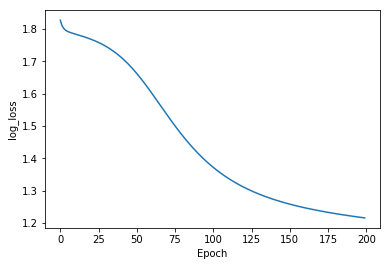

In [18]:
ffn.fit(x_train,y_train_oh,200)

In [19]:
y_pred = ffn.predict(x_train)

In [20]:
y_pred

array([[0.24408974, 0.22412359, 0.24419663, 0.24271498, 0.03143946,
        0.0134356 ],
       [0.24867739, 0.2179015 , 0.24947076, 0.24966138, 0.02439346,
        0.00989551],
       [0.02985101, 0.06131215, 0.0284847 , 0.02516319, 0.41771433,
        0.43747462],
       ...,
       [0.24867874, 0.21789942, 0.24947233, 0.2496635 , 0.02439147,
        0.00989453],
       [0.23862592, 0.22966709, 0.23807126, 0.23500126, 0.04042802,
        0.01820645],
       [0.24867641, 0.21790301, 0.24946962, 0.24965984, 0.02439491,
        0.00989621]])

In [21]:
y_pred=np.argmax(y_pred,1)
y_pred

array([2, 3, 5, 5, 3, 3, 3, 0, 3, 5, 3, 0, 5, 1, 3, 2, 5, 5, 3, 3, 3, 3,
       3, 5, 3, 3, 3, 3, 5, 1, 5, 0, 3, 2, 0, 0, 4, 5, 3, 5, 5, 5, 5, 3,
       5, 4, 3, 3, 5, 2, 2, 3, 1, 5, 3, 3, 5, 5, 5, 1, 3, 3, 5, 3, 3, 1,
       0, 0, 3, 3, 3, 2, 3, 3, 5, 5, 3, 5, 3, 3, 3, 5, 3, 1, 5, 3, 1, 3,
       3, 3, 1, 5, 5, 3, 3, 5, 5, 3, 3, 0, 3, 0, 5, 3, 3, 3, 2, 5, 5, 5,
       4, 0, 3, 0, 3, 3, 3, 3, 3, 5, 5, 3, 5, 3, 5, 3, 3, 5, 0, 0, 3, 5,
       3, 5, 5, 5, 5, 5, 3, 3, 0, 5, 5, 3, 0, 0, 5, 5, 3, 2, 5, 0, 0, 3,
       0, 3, 5, 3, 1, 3, 5, 3, 3, 5, 5, 3, 3, 3, 2, 0, 0, 3, 5, 5, 5, 0,
       3, 3, 0, 5, 5, 0, 1, 3, 0, 5, 5, 3, 3, 5, 0, 0, 3, 3, 3, 0, 5, 3,
       1, 3, 3, 0, 0, 3, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 1, 1, 3, 5, 3, 5,
       3, 3, 3, 3, 3, 5, 3, 5, 3, 3, 0, 5, 5, 0, 2, 3, 5, 0, 5, 3, 3, 5,
       5, 5, 3, 5, 5, 5, 3, 0, 3, 1, 5, 3, 2, 5, 3, 3, 3, 3, 3, 0, 5, 5,
       5, 3, 0, 5, 0, 5, 5, 3, 0, 5, 2, 5, 3, 0, 2, 3, 3, 0, 5, 3, 5, 0,
       3, 0, 5, 0, 5, 3, 5, 5, 5, 3, 3, 3, 3, 3, 5,

In [22]:
# accuracy=accuracy_score(y_pred,y_train)
y_pred.shape

(750,)

In [23]:
accuracy=accuracy_score(y_pred,y_train)


In [24]:
accuracy

0.32

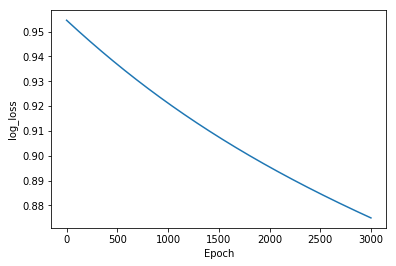

In [32]:
ffn.fit(x_train,y_train_oh,3000,0.1)

In [33]:
y_pred = ffn.predict(x_train)
y_pred=np.argmax(y_pred,1)
accuracy=accuracy_score(y_pred,y_train)
accuracy

0.664

In [34]:
y_pred_val = ffn.predict(x_val)
y_pred_val = np.argmax(y_pred_val,1)
acc_val = accuracy_score(y_pred_val,y_val)
acc_val

0.648

In [35]:
print("Train accuracy: " , accuracy)
print("Val accuracy: " , acc_val)

Train accuracy:  0.664
Val accuracy:  0.648


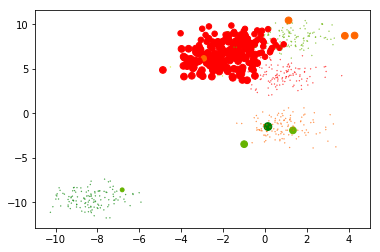

In [36]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred,cmap=my_cmap,s=15*(np.abs(y_pred-y_train)) + .1)
plt.show()